<a href="https://colab.research.google.com/github/hind-bridila/DDOS-attacks-classification/blob/main/ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
df=pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [ ]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Supprimer les espaces avant les noms de colonnes
df.columns = df.columns.str.strip()

In [ ]:
#Valeurs uniques dans la colonne cible de l'étiquette
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

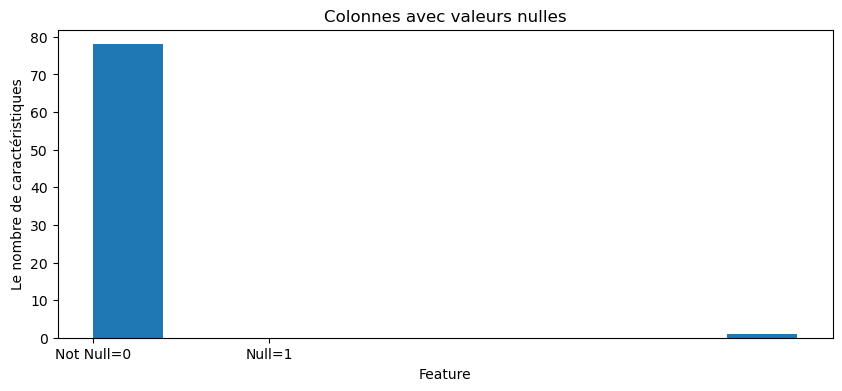

In [ ]:
#Vérification des valeurs nulles dans l'ensemble de données.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Définir le titre et les étiquettes des axes
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Colonnes avec valeurs nulles')
plt.xlabel('Feature')
plt.ylabel('Le nombre de caractéristiques')

# Show the plot
plt.show()

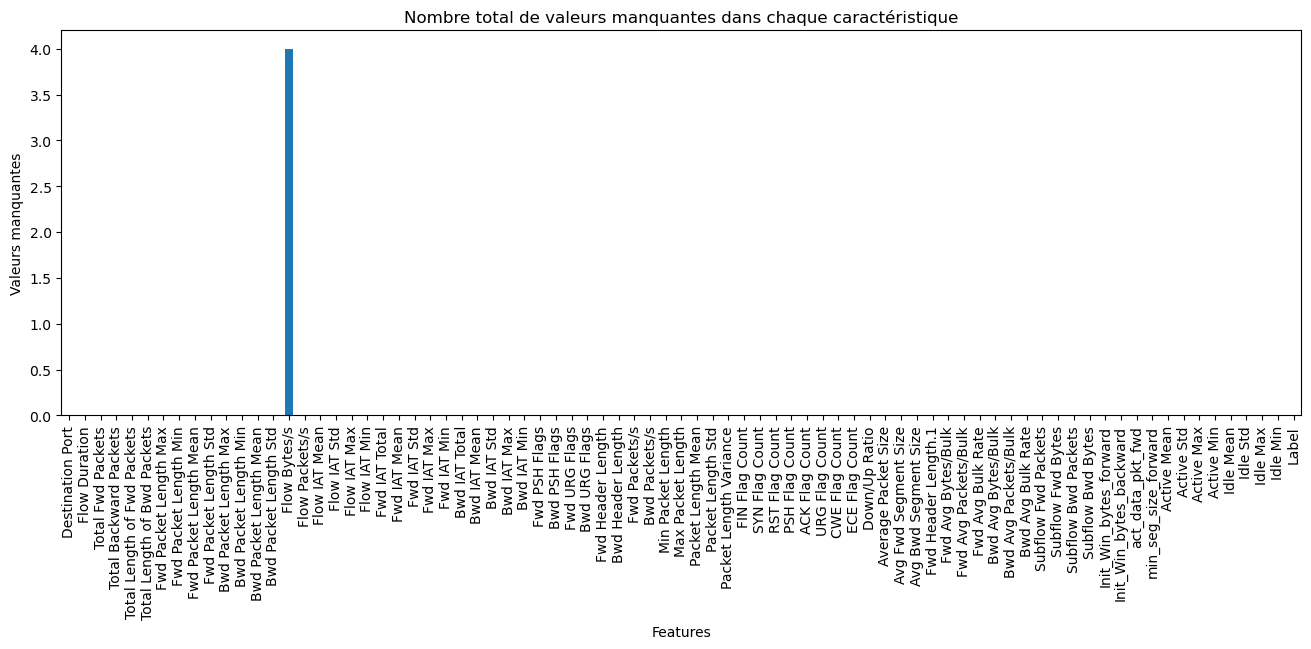

In [ ]:
#le nombre total de valeurs manquantes pour chaque colonne d'un DataFrame.
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Comptage des valeurs nulles pour chaque colonne
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Valeurs manquantes")
    plt.title("Nombre total de valeurs manquantes dans chaque caractéristique")
    plt.show()

plotMissingValues(df)

In [ ]:
test_data = df.tail(10)
df = df.head(-10)

In [ ]:
## Suppression des valeurs nulles
data_f=df.dropna()

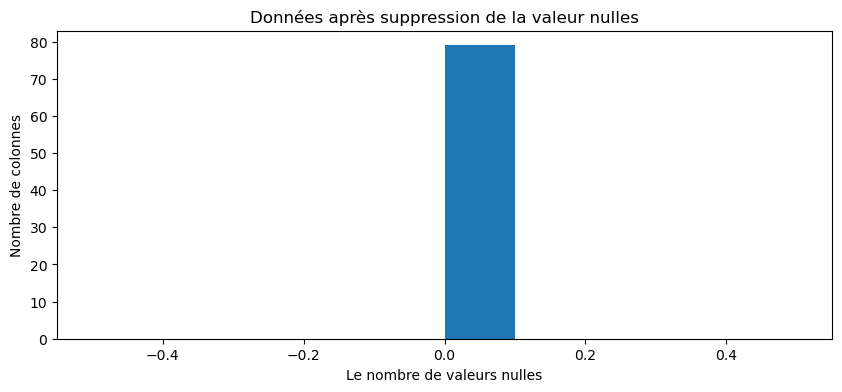

In [ ]:
#Vérification des valeurs nulles dans l'ensemble de données.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Définir le titre et les étiquettes des axes
plt.title('Données après suppression de la valeur nulles')
plt.xlabel('Le nombre de valeurs nulles')
plt.ylabel('Nombre de colonnes')

# Show the plot
plt.show()

In [ ]:
pd.set_option('use_inf_as_na', True)  # Traiter l'inf comme NaN
null_values=data_f.isnull().sum()  # Vérification des valeurs NaN

In [ ]:
# Connaître les types de données des colonnes

(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [ ]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

C:\Users\ELITE\AppData\Local\Temp\ipykernel_18008\172444858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


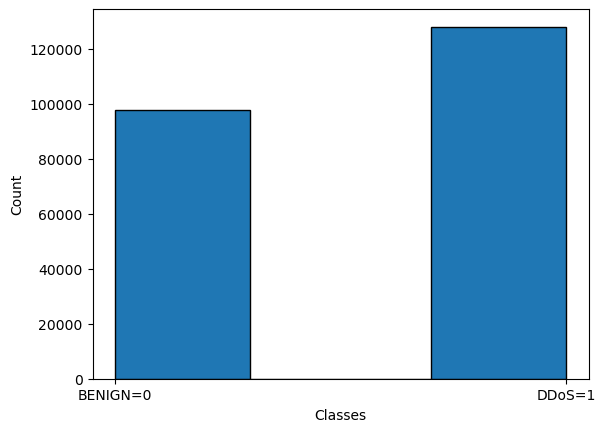

In [ ]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225725.000000,2.257250e+05,225725.000000,225725.000000,225725.000000,2.257250e+05,225725.000000,225725.000000,225725.000000,225725.000000,...,225725.000000,225725.000000,2.257250e+05,2.257250e+05,2.257250e+05,2.257250e+05,2.257250e+05,2.257250e+05,2.257250e+05,2.257250e+05
mean,8875.831937,1.624309e+07,4.875224,4.573127,939.545168,5.961005e+03,538.582071,27.884399,164.840504,214.925544,...,3.311778,21.482406,1.848425e+05,1.293550e+04,2.081033e+05,1.776358e+05,1.032306e+07,3.612263e+06,1.287927e+07,7.756042e+06
std,19751.003688,3.152540e+07,15.423521,21.756287,3249.535770,3.922003e+04,1864.204997,163.331228,504.913145,797.443955,...,12.270525,4.166441,7.979585e+05,2.102830e+05,9.002727e+05,7.842932e+05,2.185378e+07,1.275741e+07,2.692218e+07,1.983184e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,7.120700e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.452758e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,8.805291e+06,5.000000,5.000000,64.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.240766e+06,0.000000e+00,8.253982e+06,7.423768e+06
max,65532.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [ ]:
df.duplicated().sum()

2633

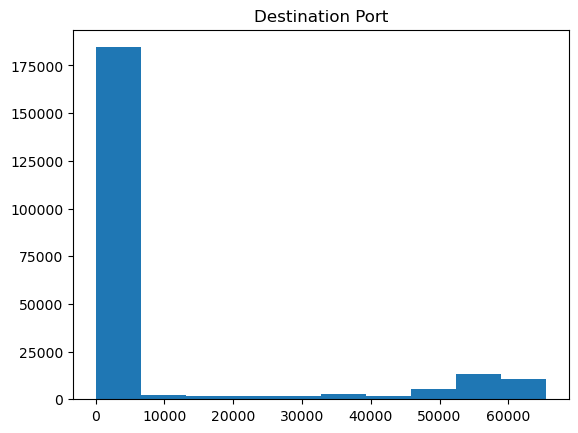

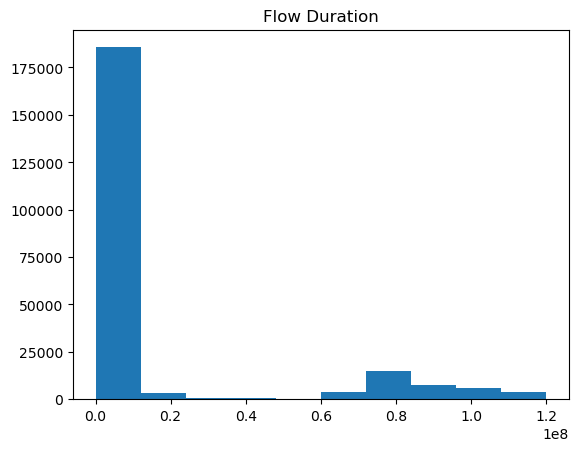

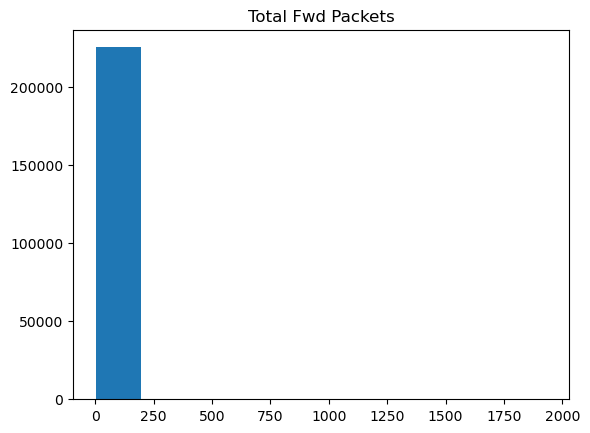

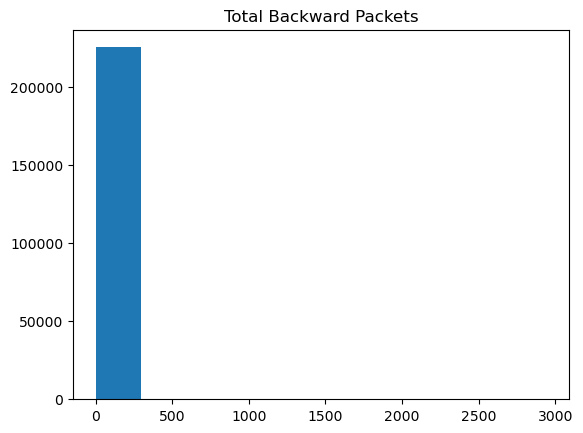

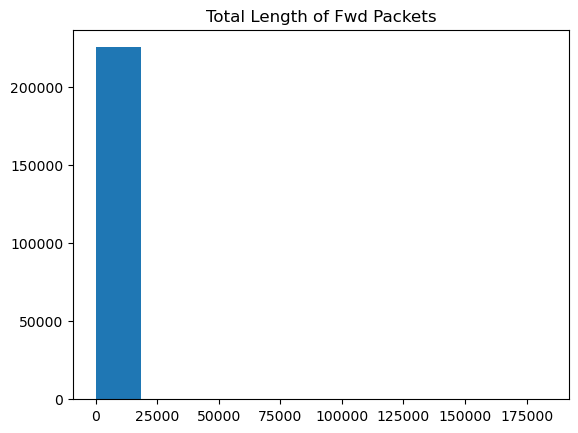

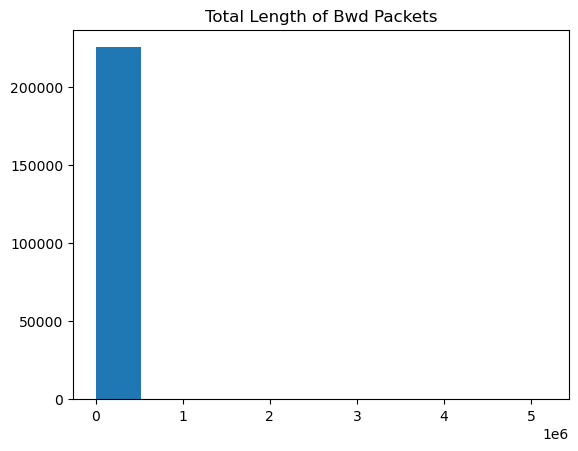

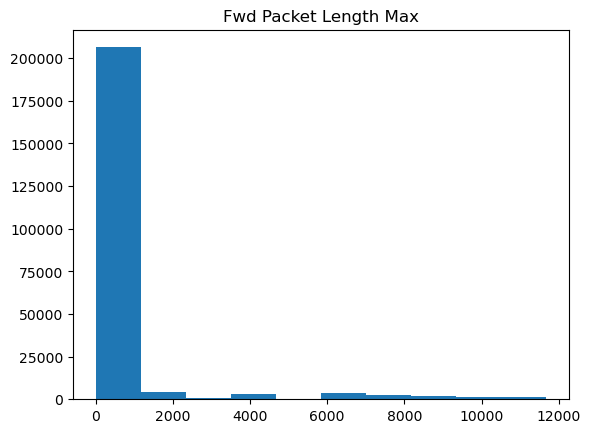

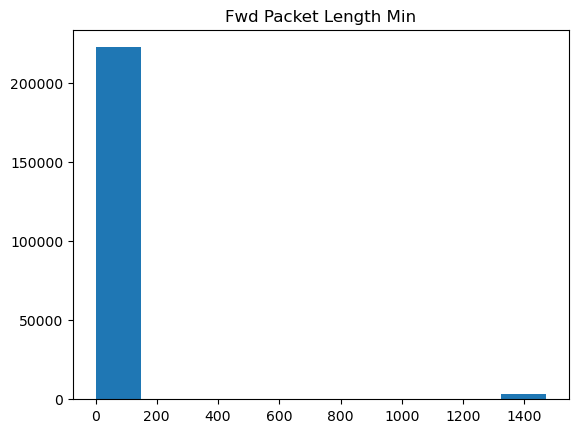

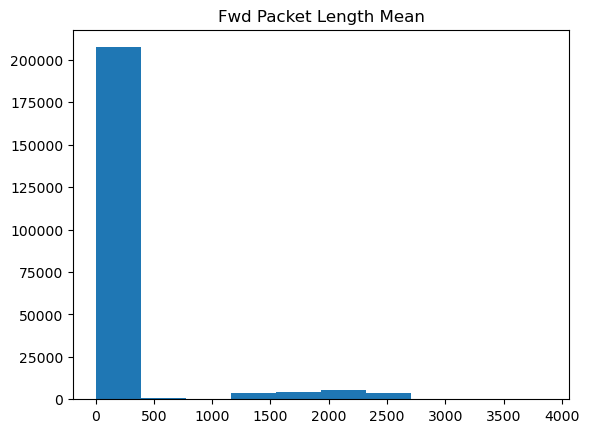

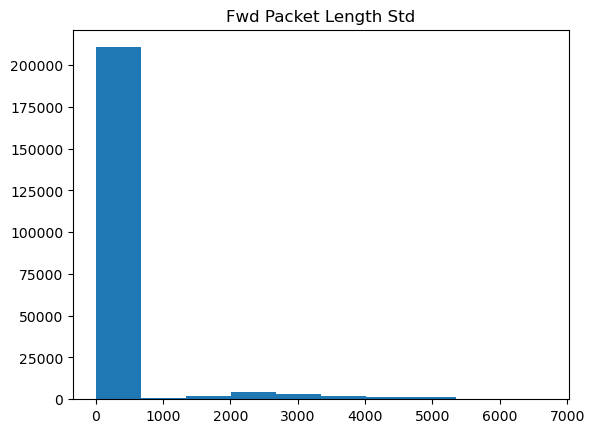

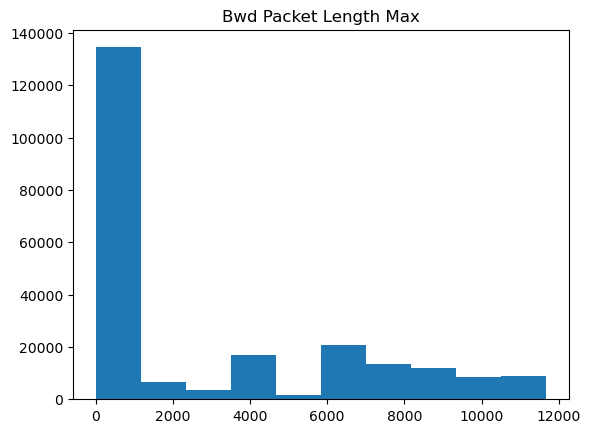

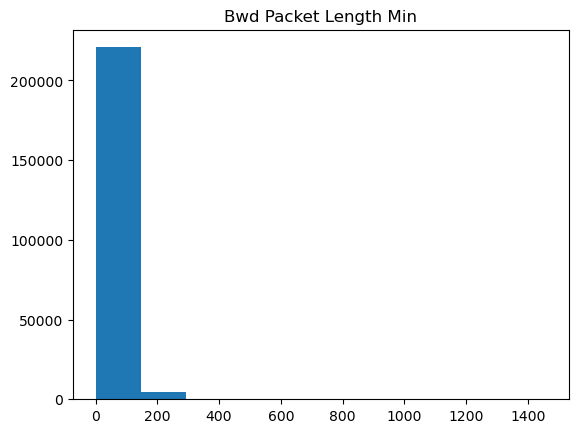

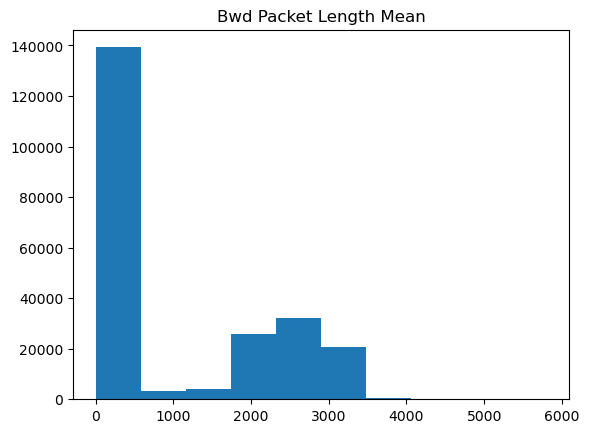

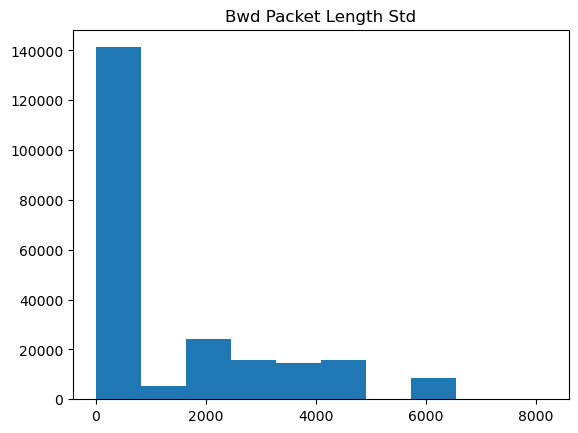

ValueError: supplied range of [-12000000.0, inf] is not finite

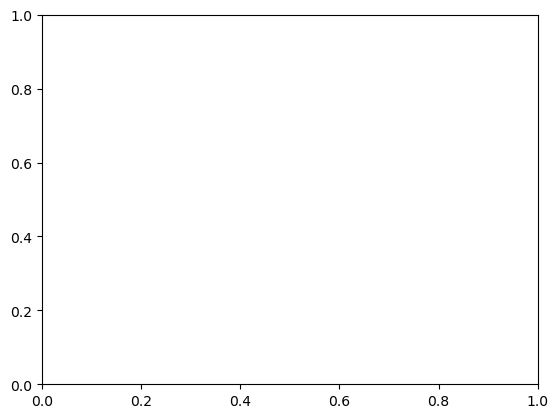

In [ ]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [ ]:
# Convertir en tableau numpy

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])

In [ ]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (158018, 78)
The test dataset size =  (67723, 78)


In [ ]:
import pandas as pd
import numpy as np  # Assurez-vous d'avoir importé NumPy
from sklearn.ensemble import RandomForestClassifier

# Vérifier les valeurs infinies dans X_train et X_test
print("Valeurs infinies dans X_train :", np.isinf(X_train).sum().sum())
print("Valeurs infinies dans X_test :", np.isinf(X_test).sum().sum())

# Remplacer les valeurs infinies par des NaN dans X_train et X_test
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Vérifier les valeurs NaN dans X_train et X_test
print("Valeurs NaN dans X_train :", X_train.isna().sum().sum())
print("Valeurs NaN dans X_test :", X_test.isna().sum().sum())

# Gérer les valeurs NaN, par exemple en les remplissant avec la moyenne ou en supprimant les lignes/colonnes
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)  # Appliquer le même traitement à X_test

# Vérifier si le problème est résolu
print("Valeurs infinies après traitement dans X_train :", np.isinf(X_train).sum().sum())
print("Valeurs infinies après traitement dans X_test :", np.isinf(X_test).sum().sum())
print("Valeurs NaN après traitement dans X_train :", X_train.isna().sum().sum())
print("Valeurs NaN après traitement dans X_test :", X_test.isna().sum().sum())

# Entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Prédire avec le modèle Random Forest
rf_pred = rf_model.predict(X_test)


Valeurs infinies dans X_train : 0
Valeurs infinies dans X_test : 22
Valeurs NaN dans X_train : 0
Valeurs NaN dans X_test : 22
Valeurs infinies après traitement dans X_train : 0
Valeurs infinies après traitement dans X_test : 0
Valeurs NaN après traitement dans X_train : 0
Valeurs NaN après traitement dans X_test : 0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Remplacer les valeurs infinies par des NaN dans X_test
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Vérifier et gérer les valeurs NaN dans X_test
X_test.fillna(X_test.mean(), inplace=True)  # ou vous pouvez utiliser dropna()

# Entraîner le modèle Random Forest (si ce n'est pas déjà fait)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction sur X_test après avoir traité les valeurs infinies/NaN
rf_pred = rf_model.predict(X_test)

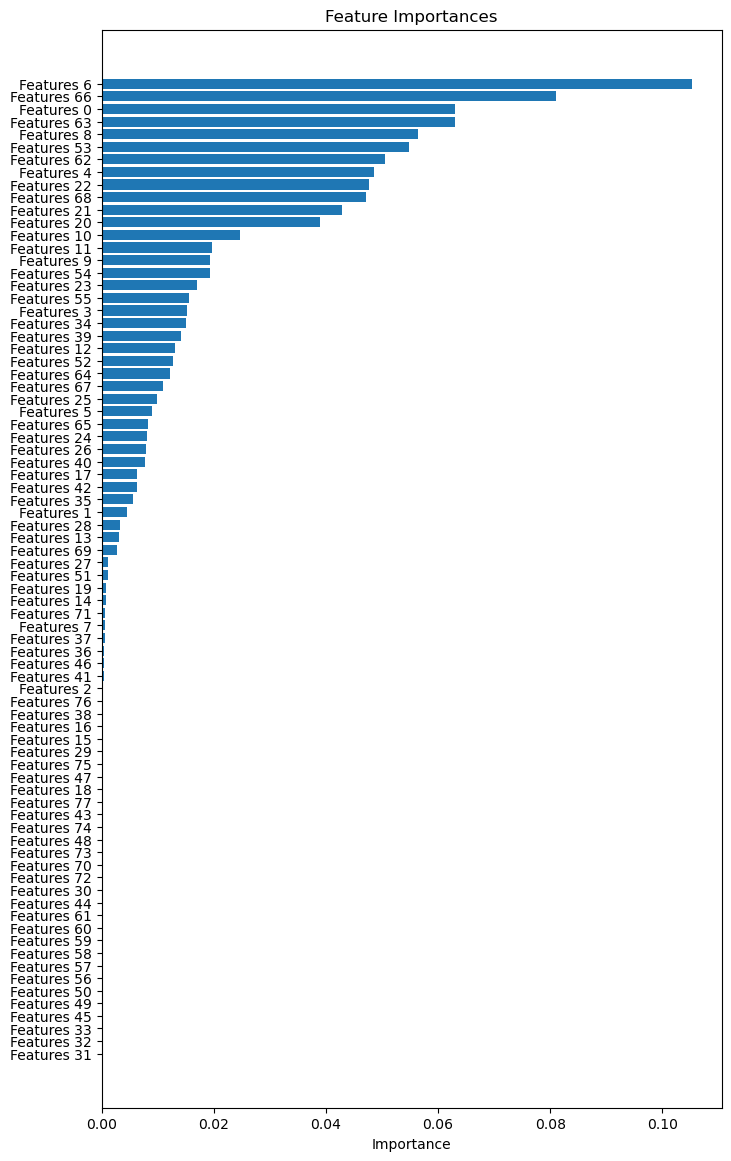

In [ ]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

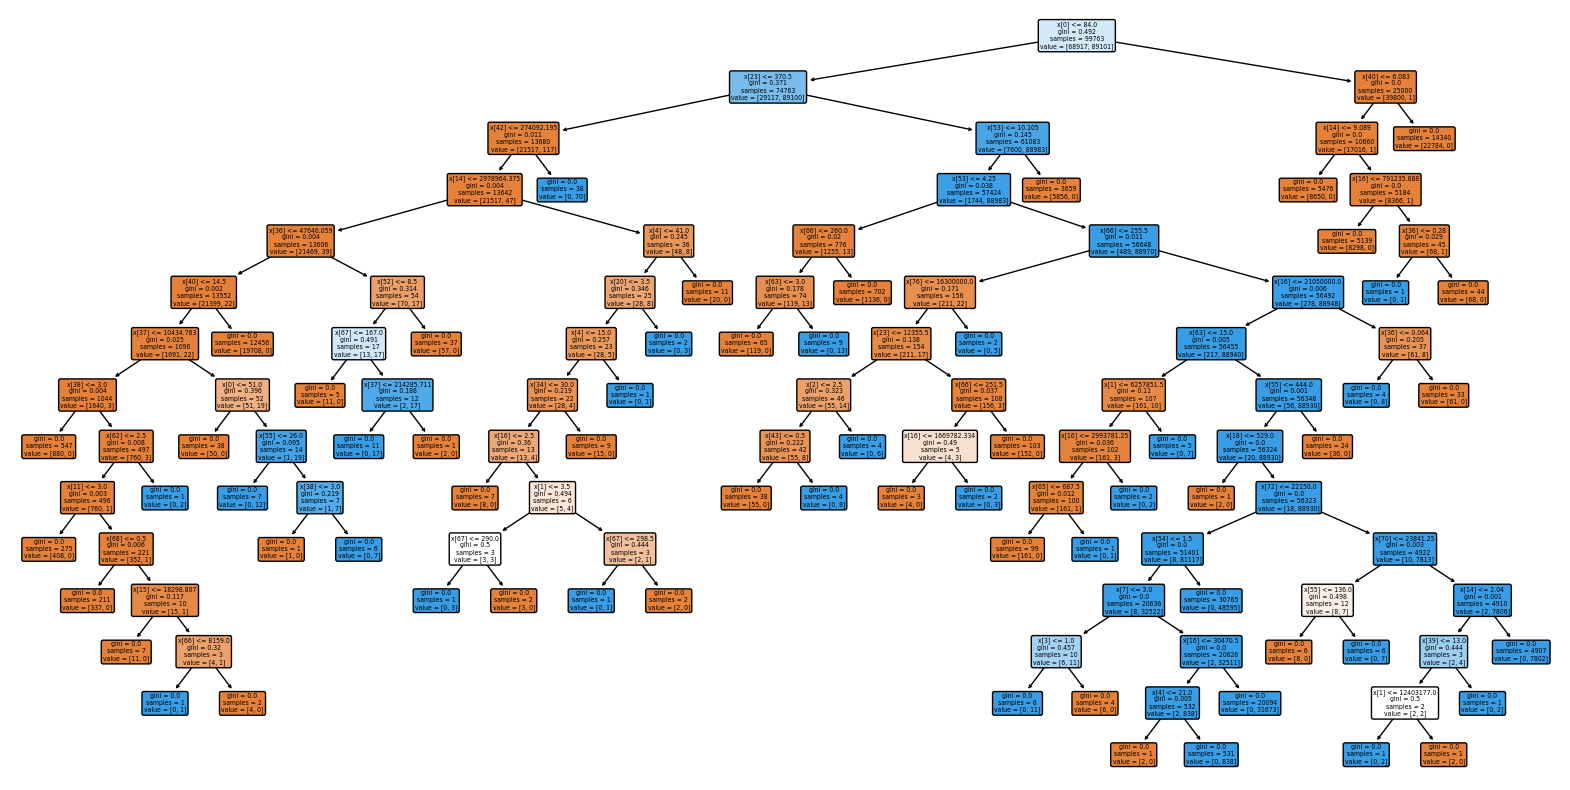

In [ ]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()



In [ ]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9998
F1 Score: 0.9998
Precision: 0.9999
Recall: 0.9996


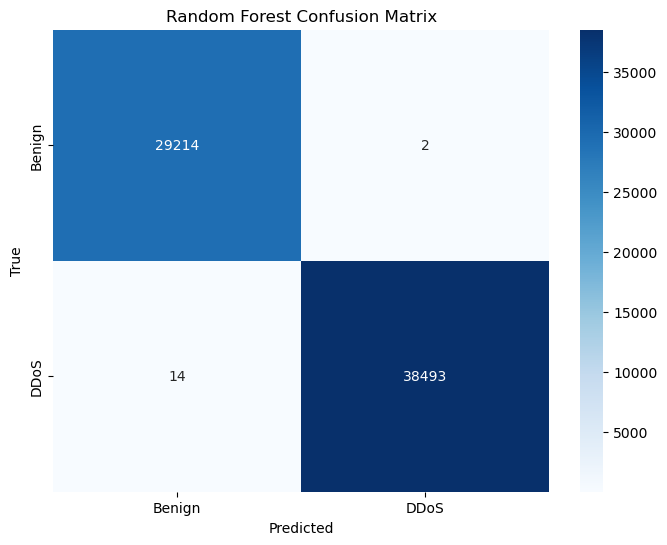

In [ ]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [ ]:
#Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Evaluate Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9386
F1 Score: 0.9484
Precision: 0.9088
Recall: 0.9916


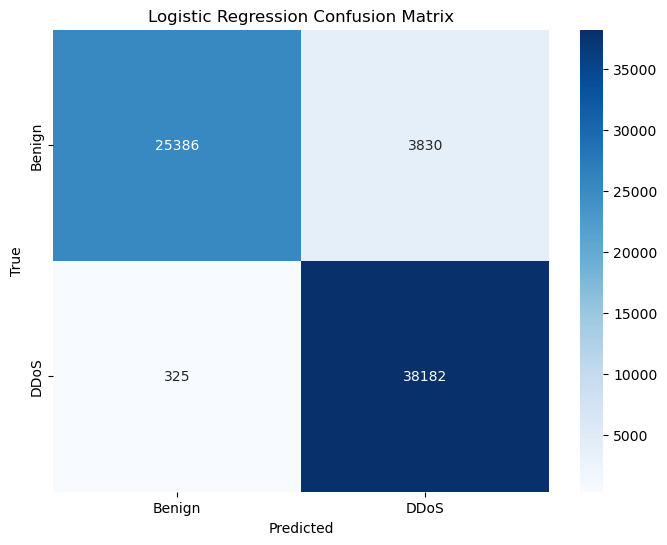

In [ ]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [ ]:
#Neurol Network
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Evaluate Neural Network
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9842
F1 Score: 0.9860
Precision: 0.9943
Recall: 0.9779


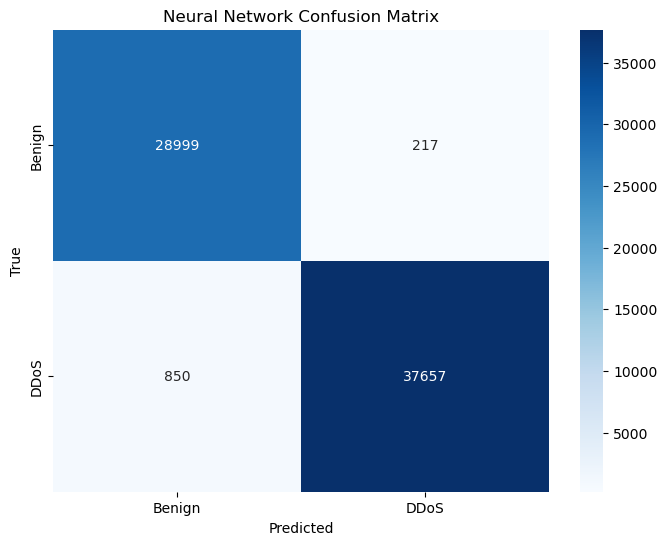

In [ ]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

In [ ]:
#Model Comparaison
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)



# Neural Network
nn_proba = nn_model.predict_proba(X_test)

In [ ]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

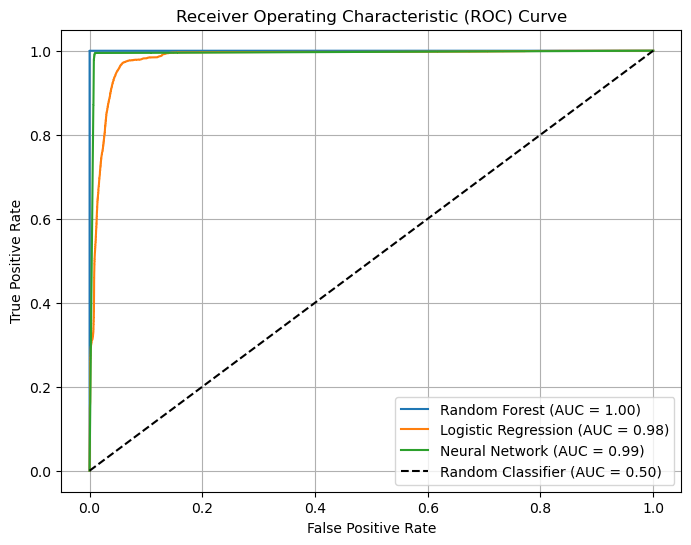

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
test_data['Label'] = test_data['Label'].map({'BENIGN': 0, 'DDoS': 1})
X_test_final = test_data.drop('Label', axis=1)
y_test_final = test_data['Label']

In [ ]:
X_test_final.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_final.fillna(X_test_final.mean(), inplace=True)

In [ ]:
print(f"Nombre de valeurs manquantes dans X_test_final : {pd.isnull(X_test_final).sum().sum()}")
print(f"Nombre de valeurs manquantes dans y_test_final : {pd.isnull(y_test_final).sum()}")


Nombre de valeurs manquantes dans X_test_final : 0
Nombre de valeurs manquantes dans y_test_final : 10


In [ ]:
print("Colonnes avec des valeurs NaN dans X_test_final :")
print(X_test_final.isna().sum())


Colonnes avec des valeurs NaN dans X_test_final :
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64


In [ ]:
X_test_final = X_test_final.fillna(X_test_final.mean())
y_test_final = y_test_final.fillna(y_test_final.mean())  # S'il y a des NaN dans y


In [ ]:
print(f"Nombre de valeurs manquantes dans y_test_final : {pd.isnull(y_test_final).sum()}")


Nombre de valeurs manquantes dans y_test_final : 10


In [ ]:
# Remplir les NaN dans y_test_final avec une valeur par défaut (par exemple, 0 ou 'Unknown')
y_test_final = y_test_final.fillna('Unknown')  # ou une autre valeur appropriée

# Alternativement, supprimer les lignes avec des NaN dans y_test_final
indices_non_nan = y_test_final.notna()
y_test_final = y_test_final[indices_non_nan]
X_test_final = X_test_final[indices_non_nan]


In [ ]:
print(f"Dimensions de X_test_final : {X_test_final.shape}")
print(f"Dimensions de y_test_final : {y_test_final.shape}")


Dimensions de X_test_final : (10, 78)
Dimensions de y_test_final : (10,)


In [ ]:
print(f"Dimensions de X_test_final : {X_test_final.shape}")
print(f"Dimensions de y_test_final : {y_test_final.shape}")


Dimensions de X_test_final : (10, 78)
Dimensions de y_test_final : (10,)


In [ ]:
predictions = rf_model.predict(X_test_final)
print(f"Nombre de valeurs manquantes dans les prédictions : {np.isnan(predictions).sum()}")


Nombre de valeurs manquantes dans les prédictions : 0


In [ ]:
predictions =lr_model.predict(X_test_final)
print(f"Nombre de valeurs manquantes dans les prédictions : {np.isnan(predictions).sum()}")


Nombre de valeurs manquantes dans les prédictions : 0


In [ ]:
 nn_model
predictions =nn_model.predict(X_test_final)
print(f"Nombre de valeurs manquantes dans les prédictions : {np.isnan(predictions).sum()}")


Nombre de valeurs manquantes dans les prédictions : 0


Type de y_test_final_encoded: int32
Type des prédictions: int32

RandomForestClassifier(n_estimators=50, random_state=42) Metrics on Final Test Data:
Accuracy: 1.0000
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000


C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


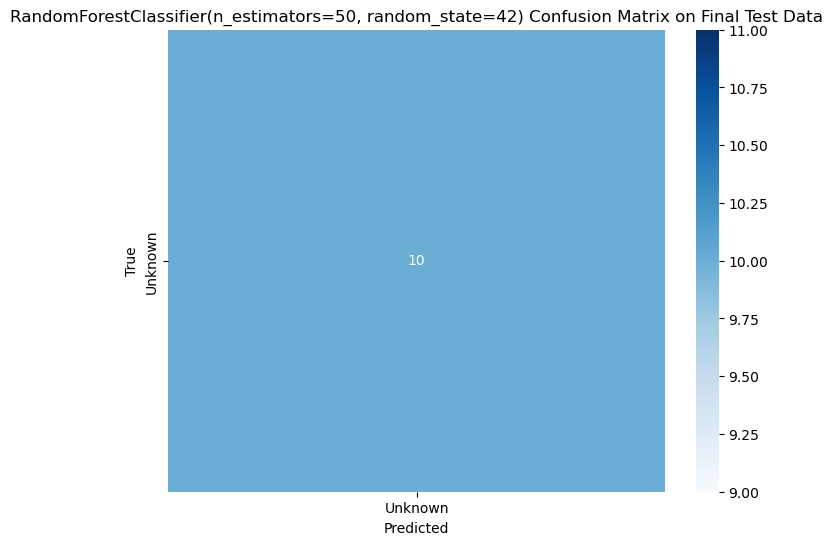

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Exemple de définition des étiquettes
# Supposons que vos étiquettes sont des chaînes de caractères
y_test_final = y_test_final.astype(str)

# Créez un LabelEncoder pour transformer les étiquettes en nombres
label_encoder = LabelEncoder()
y_test_final_encoded = label_encoder.fit_transform(y_test_final)

# Si vos prédictions sont déjà en format numérique, assurez-vous qu'ils correspondent aux étiquettes encodées
predictions = rf_model.predict(X_test_final)

# Assurez-vous que les prédictions sont également au format numérique
predictions = predictions.astype(int)

# Vérifiez les types des étiquettes et des prédictions
print(f"Type de y_test_final_encoded: {y_test_final_encoded.dtype}")
print(f"Type des prédictions: {predictions.dtype}")

# Calculer les métriques après conversion
accuracy = accuracy_score(y_test_final_encoded, predictions)
f1 = f1_score(y_test_final_encoded, predictions)
precision = precision_score(y_test_final_encoded, predictions)
recall = recall_score(y_test_final_encoded, predictions)

print(f'\n{rf_model} Metrics on Final Test Data:')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Assurez-vous que vous avez une fonction plot_confusion_matrix définie
plot_confusion_matrix(y_test_final_encoded, predictions, label_encoder.classes_, f'{rf_model} Confusion Matrix on Final Test Data')


Type de y_test_final_encoded: int32
Type des prédictions: int32

LogisticRegression(random_state=42) Metrics on Final Test Data:
Accuracy: 1.0000
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000


C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


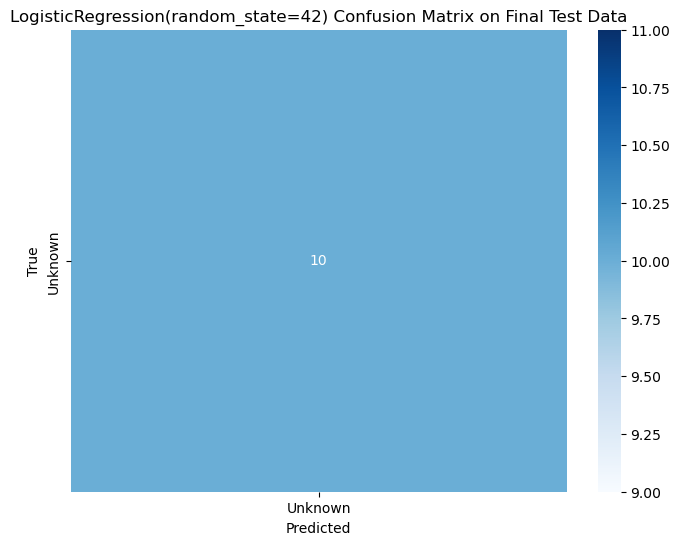

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Exemple de définition des étiquettes
# Supposons que vos étiquettes sont des chaînes de caractères
y_test_final = y_test_final.astype(str)

# Créez un LabelEncoder pour transformer les étiquettes en nombres
label_encoder = LabelEncoder()
y_test_final_encoded = label_encoder.fit_transform(y_test_final)

# Si vos prédictions sont déjà en format numérique, assurez-vous qu'ils correspondent aux étiquettes encodées
predictions = lr_model.predict(X_test_final)

# Assurez-vous que les prédictions sont également au format numérique
predictions = predictions.astype(int)

# Vérifiez les types des étiquettes et des prédictions
print(f"Type de y_test_final_encoded: {y_test_final_encoded.dtype}")
print(f"Type des prédictions: {predictions.dtype}")

# Calculer les métriques après conversion
accuracy = accuracy_score(y_test_final_encoded, predictions)
f1 = f1_score(y_test_final_encoded, predictions)
precision = precision_score(y_test_final_encoded, predictions)
recall = recall_score(y_test_final_encoded, predictions)

print(f'\n{lr_model} Metrics on Final Test Data:')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Assurez-vous que vous avez une fonction plot_confusion_matrix définie
plot_confusion_matrix(y_test_final_encoded, predictions, label_encoder.classes_, f'{lr_model} Confusion Matrix on Final Test Data')


Type de y_test_final_encoded: int32
Type des prédictions: int32

MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42) Metrics on Final Test Data:
Accuracy: 1.0000
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000


C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


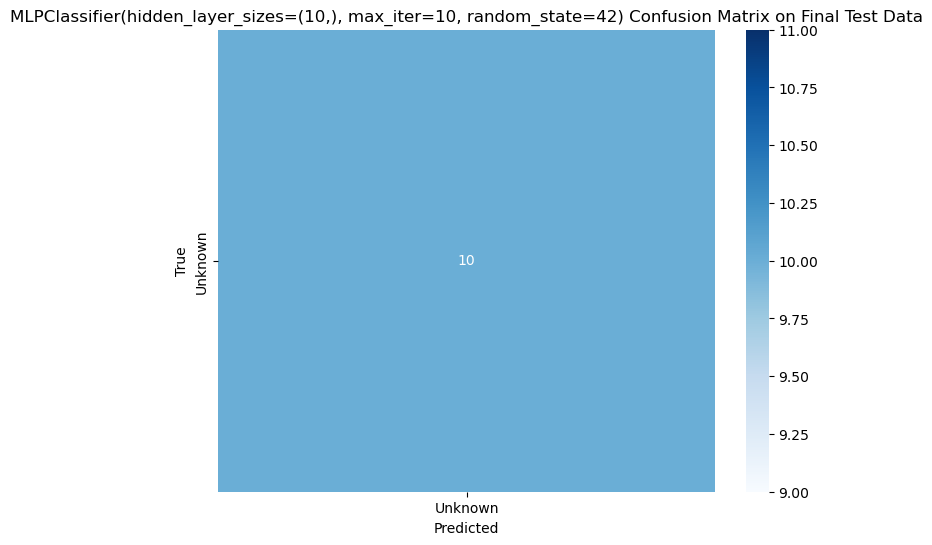

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Exemple de définition des étiquettes
# Supposons que vos étiquettes sont des chaînes de caractères
y_test_final = y_test_final.astype(str)

# Créez un LabelEncoder pour transformer les étiquettes en nombres
label_encoder = LabelEncoder()
y_test_final_encoded = label_encoder.fit_transform(y_test_final)

# Si vos prédictions sont déjà en format numérique, assurez-vous qu'ils correspondent aux étiquettes encodées
predictions = nn_model.predict(X_test_final)

# Assurez-vous que les prédictions sont également au format numérique
predictions = predictions.astype(int)

# Vérifiez les types des étiquettes et des prédictions
print(f"Type de y_test_final_encoded: {y_test_final_encoded.dtype}")
print(f"Type des prédictions: {predictions.dtype}")

# Calculer les métriques après conversion
accuracy = accuracy_score(y_test_final_encoded, predictions)
f1 = f1_score(y_test_final_encoded, predictions)
precision = precision_score(y_test_final_encoded, predictions)
recall = recall_score(y_test_final_encoded, predictions)

print(f'\n{nn_model} Metrics on Final Test Data:')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Assurez-vous que vous avez une fonction plot_confusion_matrix définie
plot_confusion_matrix(y_test_final_encoded, predictions, label_encoder.classes_, f'{nn_model} Confusion Matrix on Final Test Data')
